### 1. Carga de datos:
  * Descarga el dataset «House Prices» de Kaggle. Realiza una exploración inicial de las variables numéricas y categóricas, prestando especial atención a aquellas que están relacionadas con el tamaño de la casa, el número de habitaciones y la calidad general.
  * Revisa la distribución de la variable objetivo (precio de la casa) y observa si tiene algún sesgo.

In [1]:
# importamos las librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
# cargamos el dataset
ruta='../data/house-prices.csv'
df = pd.read_csv(filepath_or_buffer=ruta, sep=',')
df.shape

(128, 8)

In [3]:
df.info() # vemos informacion sobre el dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


In [4]:
df.describe() # mostramos la estadistica descriptiva del dataframe

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,64.500000,130427.343750,2000.937500,3.023438,2.445312,2.578125
std,37.094474,26868.770371,211.572431,0.725951,0.514492,1.069324
min,1.000000,69100.000000,1450.000000,2.000000,2.000000,1.000000
25%,32.750000,111325.000000,1880.000000,3.000000,2.000000,2.000000
50%,64.500000,125950.000000,2000.000000,3.000000,2.000000,3.000000
75%,96.250000,148250.000000,2140.000000,3.000000,3.000000,3.000000
max,128.000000,211200.000000,2590.000000,5.000000,4.000000,6.000000


In [5]:
df.isnull().sum() # verificamos si existen valores nulos

Home            0
Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64

### 2. Exploración y preprocesamiento de datos:
  * Antes de aplicar las transformaciones, realiza un análisis de las variables con distribuciones asimétricas o que contengan outliers. Estos son buenos candidatos para transformaciones logarítmicas o polinómicas.
  * También identifica variables que estén en escalas diferentes para aplicar técnicas de normalización o estandarización.

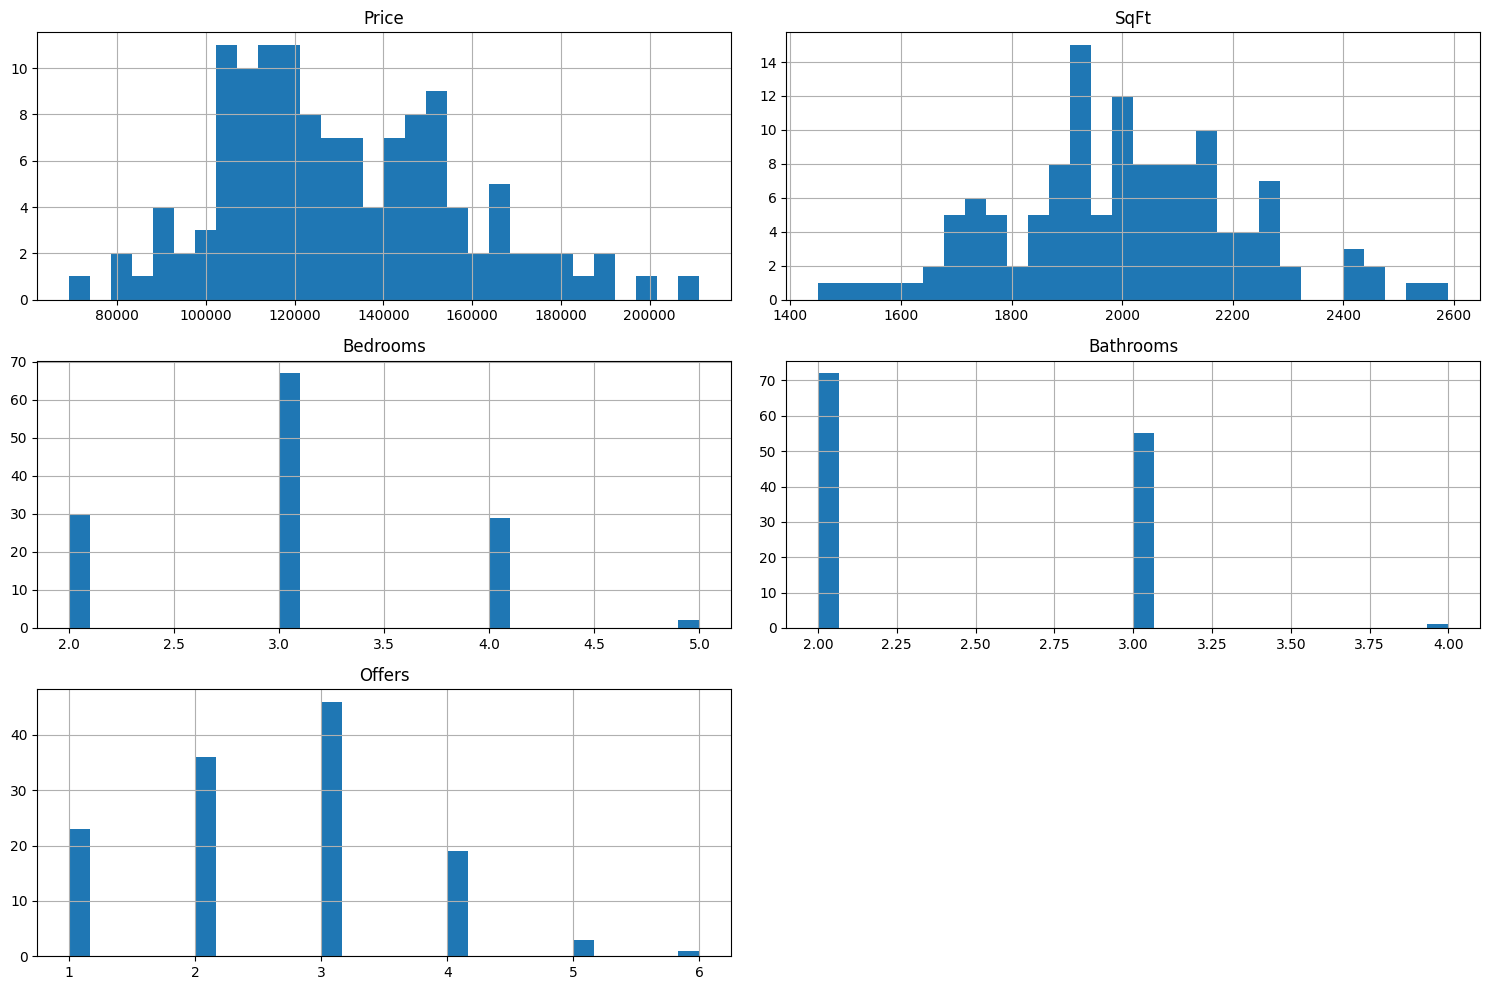

In [7]:
numeric_cols = ['Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers'] # definimos las columnas numéricas que deseamos visualizar
df[numeric_cols].hist(bins=30, figsize=(15, 10)) # generamos histogramas
plt.tight_layout()# ajustamos la disposición de los subgráficos para evitar superposiciones de los elementos gráficos
plt.show() # mostramos los gráficos generados


### 3. Transformaciones de variables:
  * Aplica transformaciones logarítmicas a variables sesgadas como el «SalePrice» y otras variables numéricas que tengan una distribución sesgada.
  * Crea variables polinómicas a partir de las variables numéricas, como el tamaño total de la casa. Por ejemplo, agrega el cuadrado o el cubo de estas variables como nuevas características para capturar posibles relaciones no lineales.
  * Estandariza las variables numéricas para que todas tengan la misma escala, lo cual es útil cuando se entrenan modelos de regresión o algoritmos basados en distancia como KNN.

In [8]:
df.isnull().sum() # verificamos la existencia de valores nulos

Home            0
Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64

In [9]:
df['Log_Price'] = np.log(df['Price']) # aplicamos una transformación logarítmica a la columna Price

In [11]:
df.isnull().sum() # verificamos que no haya valores nulos

Home            0
Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
Log_Price       0
dtype: int64

In [12]:
# calculamos el cuadrado de la columna 'SqFt' y lo guardamos en una nueva columna 'SqFt_Squared'
df['SqFt_Squared'] = df['SqFt'] ** 2
# calculamos el cubo de la columna 'SqFt' y lo guardamos en una nueva columna 'SqFt_Cubed'
df['SqFt_Cubed'] = df['SqFt'] ** 3

In [13]:
# creamos un objeto 'scaler' de la clase StandardScaler para normalizar las columnas numéricas
scaler = StandardScaler()
# aplicamos la normalización (escalado) a las columnas numéricas del DataFrame
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

### 4. Evaluación de las transformaciones:
  * Aplica un modelo de regresión antes y después de las transformaciones para evaluar su impacto en el rendimiento del modelo.
  * Compara métricas como el RMSE (Root Mean Squared Error) y el R-squared para ver si las transformaciones logarítmicas y polinómicas han mejorado la predicción del precio de las casas.

In [14]:
# dividimos los datos en conjunto de entrenamiento y prueba
X = df[['SqFt', 'Bedrooms', 'Bathrooms', 'Offers']]
y = df['Log_Price']  # Usando Log_Price para el modelo transformado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
model_before = LinearRegression() # creamos una instancia del modelo de regresión lineal
model_before.fit(X_train, y_train) # entrenamos el modelo con los datos de entrenamiento (X_train y y_train)
y_pred_before = model_before.predict(X_test) # realizamos predicciones sobre el conjunto de prueba (X_test)
rmse_before = mean_squared_error(y_test, y_pred_before, squared=False) # calculamos el RMSE (Raíz del error cuadrático medio) para evaluar el rendimiento del modelo
r2_before = r2_score(y_test, y_pred_before) # calculamos el R-squared (coeficiente de determinación) para medir la calidad del modelo


/home/cvelazquez/anaconda3/envs/ds_mitic/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [19]:
# seleccionamos un subconjunto de características transformadas para el modelo
X_transformed = df[['SqFt_Squared', 'Bedrooms', 'Bathrooms', 'Offers']]
# dividimos los datos transformados en entrenamiento y prueba
X_train_transformed, X_test_transformed, y_train_transformed, y_test_transformed = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

model_after = LinearRegression() # creamos una instancia de un modelo de regresión lineal
model_after.fit(X_train_transformed, y_train_transformed) # entrenamos el modelo con los datos de entrenamiento transformados
y_pred_after = model_after.predict(X_test_transformed) # realizamos predicciones sobre el conjunto de prueba transformado
rmse_after = mean_squared_error(y_test_transformed, y_pred_after, squared=False) # calculamos el RMSE (Raíz del error cuadrático medio) para evaluar el rendimiento del modelo transformado
r2_after = r2_score(y_test_transformed, y_pred_after) # calculamos el R-squared (coeficiente de determinación) para medir la calidad del modelo transformado


/home/cvelazquez/anaconda3/envs/ds_mitic/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [20]:
# mostramos los resultados del rendimiento del modelo antes de realizar cualquier transformación
print(f'RMSE antes de transformaciones: {rmse_before:.4f}, R-squared: {r2_before:.4f}')
print(f'RMSE después de transformaciones: {rmse_after:.4f}, R-squared: {r2_after:.4f}')

RMSE antes de transformaciones: 0.1242, R-squared: 0.5756
RMSE después de transformaciones: 0.1274, R-squared: 0.5534


## 5. Interpretación de los resultados:

* Las transformaciones aplicadas (logarítmicas y polinómicas) no mejoraron el rendimiento del modelo; en cambio, empeoraron tanto la precisión como la capacidad explicativa. Esto sugiere que estas transformaciones no fueron adecuadas para este conjunto específico de datos.
* Es crucial evaluar cuidadosamente cualquier transformación aplicada a los datos, ya que no todas las técnicas son efectivas para todos los conjuntos de datos y problemas específicos.